# Playing with isochrones


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/BHAC15_iso.ukidss"

skiprows = 97
end = 127
myr_2 = np.loadtxt(filepath, skiprows=skiprows, max_rows=end-skiprows)

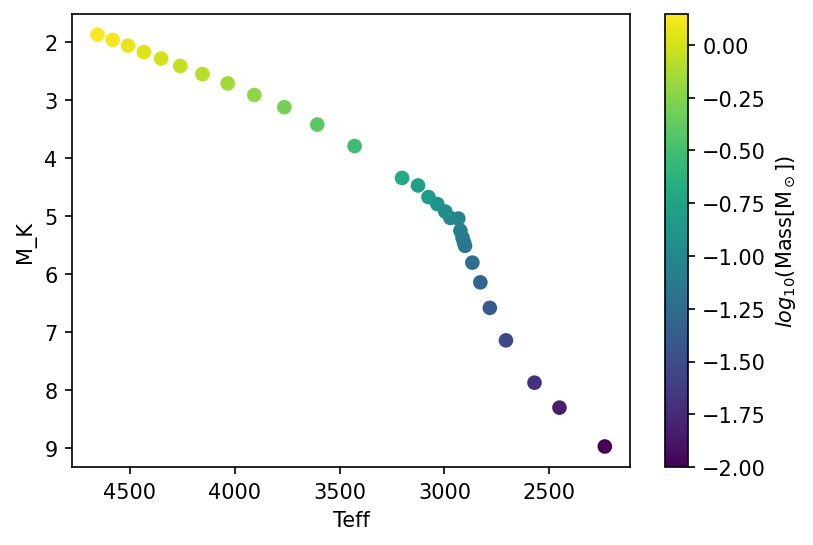

In [3]:

teff = myr_2[:,1]
Mk = myr_2[:, -1]
M = myr_2[:, 0]

plt.figure(dpi=150)

plt.scatter(teff, Mk, c=np.log10(M))
plt.colorbar(label=r"$log_{10} \left( \rm{Mass} \left[ M_\odot \right] \right)$" )
plt.xlabel("Teff")
plt.ylabel("M_K")

ax = plt.gca()
# everything in astronomy is backwards
ax.invert_yaxis()
ax.invert_xaxis()

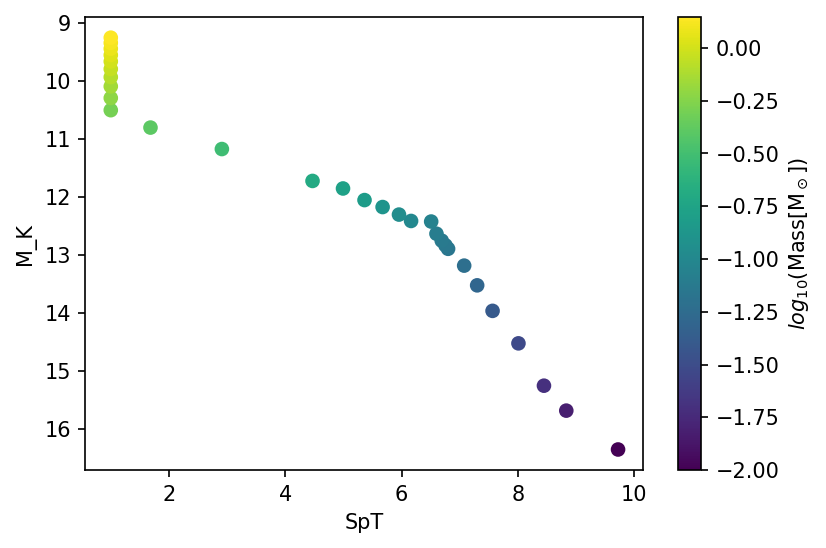

In [4]:
from wuvars.analysis.spectral_type_to_temperature import get_SpT_from_Teff

teff = myr_2[:,1]
SpT = get_SpT_from_Teff(teff)

Mk = myr_2[:, -1]
distmod = 5 * np.log10(300) - 5
observed_K = Mk + distmod

M = myr_2[:, 0]

plt.figure(dpi=150)

plt.scatter(SpT, observed_K, c=np.log10(M))
plt.colorbar(label=r"$log_{10} \left( \rm{Mass} \left[ M_\odot \right] \right)$" )
plt.xlabel("SpT")
plt.ylabel("M_K")

ax = plt.gca()
ax.invert_yaxis()

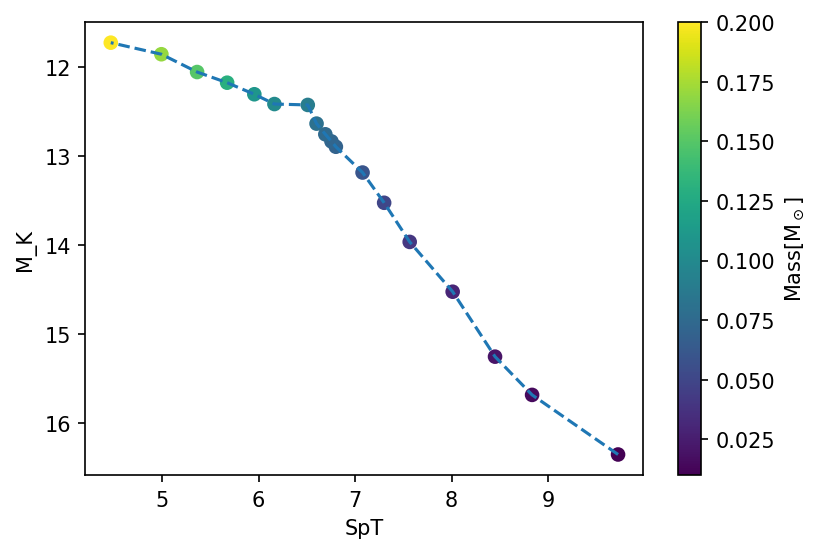

In [5]:
useful_part_of_table = (M <= 0.2)

teff_u = myr_2[:,1][useful_part_of_table]
SpT_u = get_SpT_from_Teff(teff_u)

Mk_u = myr_2[:, -1][useful_part_of_table]
distmod = 5 * np.log10(300) - 5
observed_K_u = Mk_u + distmod

M_u = myr_2[:, 0][useful_part_of_table]

plt.figure(dpi=150)

plt.scatter(SpT_u, observed_K_u, c=M_u)
plt.plot(SpT_u, observed_K_u, '--')
# plt.colorbar(label=r"$log_{10} \left( \rm{Mass} \left[ M_\odot \right] \right)$" )
plt.colorbar(label=r"$\rm{Mass} \left[ M_\odot \right] $" )
plt.xlabel("SpT")
plt.ylabel("M_K")

ax = plt.gca()
ax.invert_yaxis()

In [6]:
# Everything from here on I'm adding in or after August 2023

In [12]:
filepath = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/BHAC15_iso.ukidss"

age_dict = {}
age_dict[1] = {'skiprows': 59, 'end': 89}
age_dict[2] = {'skiprows': 97, 'end': 127}
age_dict[5] = {'skiprows': 211, 'end': 241}

# skiprows = 97
# end = 127
# myr_2 = np.loadtxt(filepath, skiprows=skiprows, max_rows=end-skiprows)

def load_isochrone(age):
    myr_x = np.loadtxt(filepath, skiprows=age_dict[age]['skiprows'], max_rows=age_dict[age]['end']-age_dict[age]['skiprows'])
    return myr_x
    
myr_1 = load_isochrone(1)
myr_2 = load_isochrone(2)
myr_5 = load_isochrone(5)

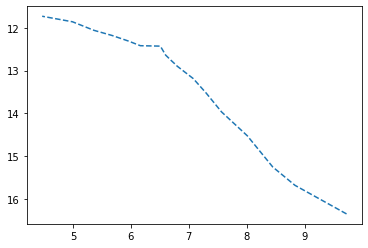

In [8]:
# plt.scatter(SpT_u, observed_K_u, c=M_u)


plt.plot(SpT_u, observed_K_u, '--')
ax = plt.gca()
ax.invert_yaxis()

In [48]:
myr_stack = np.vstack([myr_1, myr_2, myr_5]).reshape(3, 30,11)
print(myr_1.shape)
print(myr_stack.shape)

(30, 11)
(3, 30, 11)


In [52]:
print(myr_1[1])
print("")
print(myr_stack[0,1])

for i in range(30):
    print(myr_1[i] - myr_stack[0,i])

[ 1.500e-02  2.504e+03 -2.420e+00  3.590e+00  3.260e-01  1.000e+00
  9.420e+00  1.051e+01  8.610e+00  8.190e+00  7.760e+00]

[ 1.500e-02  2.504e+03 -2.420e+00  3.590e+00  3.260e-01  1.000e+00
  9.420e+00  1.051e+01  8.610e+00  8.190e+00  7.760e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

In [70]:
from wuvars.analysis.spectral_type_to_temperature import get_SpT_from_Teff, get_SpT_from_Teff_HH14


M =  0.01
M =  0.015
M =  0.02
M =  0.03
M =  0.04
M =  0.05
M =  0.06
M =  0.07
M =  0.072
M =  0.075
M =  0.08
M =  0.09
M =  0.1
M =  0.11
M =  0.13
M =  0.15
M =  0.17
M =  0.2
M =  0.3


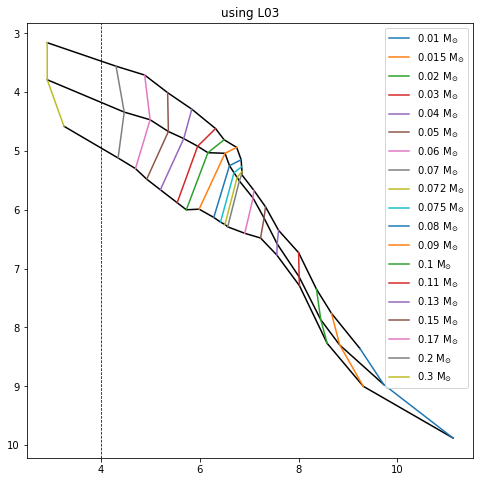

In [82]:
fig = plt.figure(figsize=(8,8))

for myr_x, age in zip([myr_1, myr_2, myr_5], [1, 2, 5]):

    teff = myr_x[:,1]
    Mk = myr_x[:, -1]
    M = myr_x[:, 0]
    
    u = M <= 0.3
    
    SpT = get_SpT_from_Teff(teff)
    
    plt.plot(SpT[u], Mk[u], 'k') #, label=f"{age} Myr")


for i in range(len(M)):
#    M_i = M[i]
    
    teff_i = myr_stack[:,i,1]
    Mk_i = myr_stack[:,i, -1]
    M_i = myr_stack[:,i, 0]

    SpT_i = get_SpT_from_Teff(teff_i)
    
    if M_i[0] <= 0.3:
        print("M = ", M_i[0])
        plt.plot(SpT_i, Mk_i, label=f"{M_i[0]} M$_{{\odot}}$")
    

ax = plt.gca()
ax.invert_yaxis()
ax.legend()
ax.set_title("using L03")
ax.axvline(4, color='k', linestyle='--', lw=0.75)

# ax.set_xlim(4, None)

M =  0.01
M =  0.015
M =  0.02
M =  0.03
M =  0.04
M =  0.05
M =  0.06
M =  0.07
M =  0.072
M =  0.075
M =  0.08
M =  0.09
M =  0.1
M =  0.11
M =  0.13
M =  0.15
M =  0.17
M =  0.2
M =  0.3


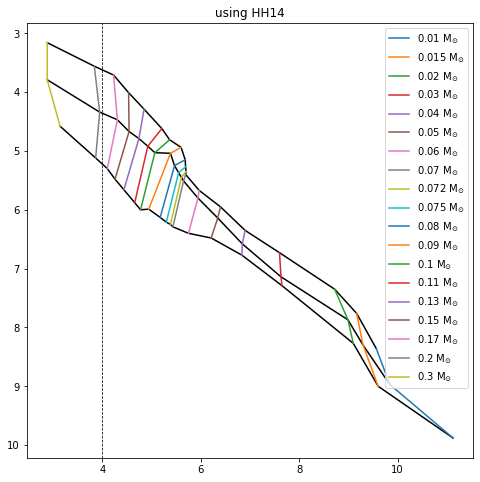

In [81]:
fig = plt.figure(figsize=(8,8))

for myr_x, age in zip([myr_1, myr_2, myr_5], [1, 2, 5]):

    teff = myr_x[:,1]
    Mk = myr_x[:, -1]
    M = myr_x[:, 0]
    
    u = M <= 0.3
    
    SpT = get_SpT_from_Teff_HH14(teff)
    
    plt.plot(SpT[u], Mk[u], 'k') #, label=f"{age} Myr")



for i in range(len(M)):
#    M_i = M[i]
    
    teff_i = myr_stack[:,i,1]
    Mk_i = myr_stack[:,i, -1]
    M_i = myr_stack[:,i, 0]

    SpT_i = get_SpT_from_Teff_HH14(teff_i)
    
    if M_i[0] <= 0.3:
        print("M = ", M_i[0])
        plt.plot(SpT_i, Mk_i, label=f"{M_i[0]} M$_{{\odot}}$")
    

ax = plt.gca()
ax.invert_yaxis()
ax.legend()
ax.set_title("using HH14")

ax.axvline(4, color='k', linestyle='--', lw=0.75)
# ax.set_xlim(4, None)

M =  0.01
M =  0.015
M =  0.02
M =  0.03
M =  0.04
M =  0.05
M =  0.06
M =  0.08
M =  0.1
M =  0.15
M =  0.2
M =  0.3


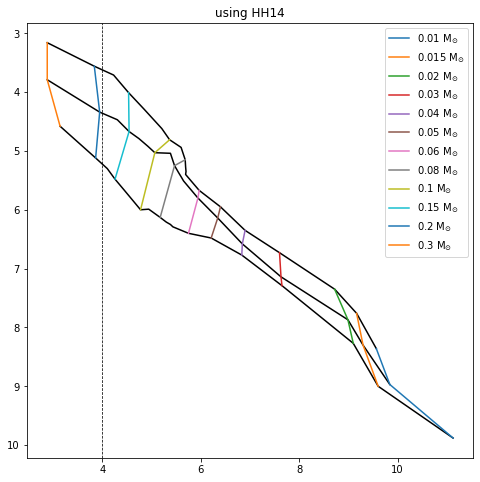

In [83]:
fig = plt.figure(figsize=(8,8))

for myr_x, age in zip([myr_1, myr_2, myr_5], [1, 2, 5]):

    teff = myr_x[:,1]
    Mk = myr_x[:, -1]
    M = myr_x[:, 0]
    
    u = M <= 0.3
    
    SpT = get_SpT_from_Teff_HH14(teff)
    
    plt.plot(SpT[u], Mk[u], 'k') #, label=f"{age} Myr")


masslist = [0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.3]

for i in range(len(M)):
#    M_i = M[i]
    
    teff_i = myr_stack[:,i,1]
    Mk_i = myr_stack[:,i, -1]
    M_i = myr_stack[:,i, 0]

    SpT_i = get_SpT_from_Teff_HH14(teff_i)
    
    if M_i[0] <= 0.3:
        if M_i[0] in masslist:
            print("M = ", M_i[0])
            plt.plot(SpT_i, Mk_i, label=f"{M_i[0]} M$_{{\odot}}$")
    

ax = plt.gca()
ax.invert_yaxis()
ax.legend()
ax.set_title("using HH14")

ax.axvline(4, color='k', linestyle='--', lw=0.75)
# ax.set_xlim(4, None)

M =  0.3
M =  0.2
M =  0.15
M =  0.1
M =  0.08
M =  0.06
M =  0.05
M =  0.04
M =  0.03
M =  0.02
M =  0.01


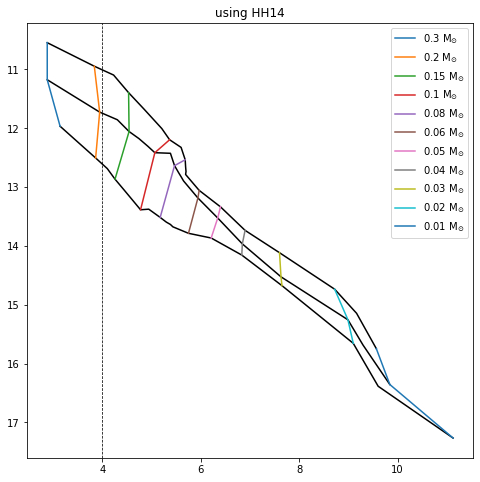

In [86]:
fig = plt.figure(figsize=(8,8))

distmod = 5 * np.log10(300) - 5

for myr_x, age in zip([myr_1, myr_2, myr_5], [1, 2, 5]):

    teff = myr_x[:,1]
    Mk = myr_x[:, -1]
    M = myr_x[:, 0]
    
    u = M <= 0.3
    
    SpT = get_SpT_from_Teff_HH14(teff)
    
    plt.plot(SpT[u], Mk[u] + distmod, 'k') #, label=f"{age} Myr")


masslist = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.3]

for i in range(len(M))[::-1]:
#    M_i = M[i]
    
    teff_i = myr_stack[:,i,1]
    Mk_i = myr_stack[:,i, -1]
    M_i = myr_stack[:,i, 0]

    SpT_i = get_SpT_from_Teff_HH14(teff_i)
    
    if M_i[0] <= 0.3:
        if M_i[0] in masslist:
            print("M = ", M_i[0])
            plt.plot(SpT_i, Mk_i + distmod, label=f"{M_i[0]} M$_{{\odot}}$")
    

ax = plt.gca()
ax.invert_yaxis()
ax.legend()
ax.set_title("using HH14")

ax.axvline(4, color='k', linestyle='--', lw=0.75)
# ax.set_xlim(4, None)

In [92]:
filepath = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/BHAC15_iso.ukidss"

age_dict = {}
age_dict[0.5] = {'skiprows': 21, 'end': 51}
age_dict[1] = {'skiprows': 59, 'end': 89}
age_dict[2] = {'skiprows': 97, 'end': 127}
age_dict[5] = {'skiprows': 211, 'end': 241}
age_dict[8] = {'skiprows': 249, 'end': 279}
age_dict[10] = {'skiprows': 287, 'end': 317}

# skiprows = 97
# end = 127
# myr_2 = np.loadtxt(filepath, skiprows=skiprows, max_rows=end-skiprows)

def load_isochrone(age):
    myr_x = np.loadtxt(filepath, skiprows=age_dict[age]['skiprows'], max_rows=age_dict[age]['end']-age_dict[age]['skiprows'])
    return myr_x

myr_0_5 = load_isochrone(0.5)
myr_1 = load_isochrone(1)
myr_2 = load_isochrone(2)
myr_5 = load_isochrone(5)
myr_8 = load_isochrone(8)
myr_10 = load_isochrone(10)

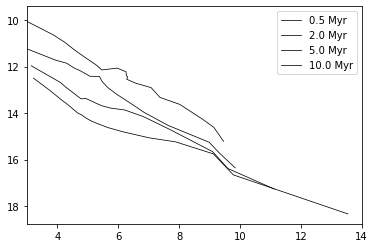

In [99]:
# Let's reproduce something very much like Lalchand et al. 2022
# But - projected into the observable space for 
#okay, so 

fig, ax = plt.subplots(1)

ages = [0.5, 2.0, 5.0, 10.0]

for age in ages:
    
    myr_x = load_isochrone(age)
    
    teff = myr_x[:,1]
    Mk = myr_x[:, -1]
    M = myr_x[:, 0]
    
    u = M <= 0.3
    
    SpT = get_SpT_from_Teff_HH14(teff)
    
    plt.plot(
        SpT[u], 
        Mk[u] + distmod, 
        'k',
        lw=0.75,
        label=f"{age} Myr"
    )

for mass in masses:
    
ax.set_xlim(3, 14)
ax.invert_yaxis()
plt.legend()

    

In [100]:
print(21 -  51)
print(59 -  89)
print(97 -  127)
print(211 -  241)
print(249 -  279)
print(287 -  317)

-30
-30
-30
-30
-30
-30


In [102]:
print(21 -  59)
print(59 -  97)
print(97 -  127)

print(211 -  249)
print(249 -  287)


-38
-38
-30
-38
-38


In [128]:
def find_line_given_age(age_Gyr, file):
    with open(file, 'r') as fp:
        lines = fp.readlines()
        for i, line in enumerate(lines):
            if ('t (Gyr)' in line):
                line_age = line[15:-1]
                if float(line_age) == age_Gyr:
#                     print("MATCH: ", line_age, age, i)
                    return i
    return None
#                 else:
#                     print("NOT MATCH: ", line_age, age)                        
print(find_line_given_age(1.00, file))
print(find_line_given_age(0.005, file))
print(find_line_given_age(0.001, file))
print(find_line_given_age(0.0005, file))
print(find_line_given_age(0.00051, file))

847
207
55
17
None


In [139]:
def extract_age_array_Gyr(file):
    with open(file, 'r') as fp:
        lines = fp.readlines()
        output = []
        for i, line in enumerate(lines):
            if ('t (Gyr)' in line):
                line_age = line[14:-1]
                output.append(float(line_age))
    return np.array(output)

extract_age_array_Gyr(file)


array([5.00e-04, 1.00e-03, 2.00e-03, 3.00e-03, 4.00e-03, 5.00e-03,
       8.00e-03, 1.00e-02, 1.50e-02, 2.00e-02, 2.50e-02, 3.00e-02,
       4.00e-02, 5.00e-02, 8.00e-02, 1.00e-01, 1.20e-01, 2.00e-01,
       3.00e-01, 4.00e-01, 5.00e-01, 6.25e-01, 8.00e-01, 1.00e+00,
       2.00e+00, 3.00e+00, 4.00e+00, 5.00e+00, 8.00e+00, 1.00e+01])

In [183]:
def load_isochrone_generic(
    age_Myr, 
    file="/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/BHAC15_iso.ukidss"
):
    
    start_line = find_line_given_age(age_Myr/1e3, file)
    
    subtracted_rows = 0
    while subtracted_rows <= 30:
        try:
            myr_x = np.loadtxt(filepath, skiprows=start_line+4, max_rows=30-subtracted_rows)
            for i in range(subtracted_rows):
                pad = np.ones(11) * np.nan
                myr_x = np.vstack([pad, myr_x])
            return myr_x
        except ValueError:
            subtracted_rows += 1
        except TypeError:
            return None
            
    return myr_x

myr_0_5 = load_isochrone_generic(0.5)

In [184]:
load_isochrone_generic(100)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [ 3.000e-02,  1.912e+03, -3.740e+00,  4.730e+00,  1.240e-01,
         1.000e+00,  1.353e+01,  1.501e+01,  1.199e+01,  1.126e+01,
         1.073e+01],
       [ 4.000e-02,  2.311e+03, -3.360e+00,  4.810e+00,  1.300e-01,
         1.000e+00,  1.185e+01,  1.303e+01,  1.085e+01,  1.040e+01,
         1.003e+01],
       [ 5.000e-02,  2.525e+03, -3.150e+00,  4.850e+00,  1.390e-01,
         9.990e-01,  1.127e+01,  1.224e+01,  1.041e+01,  9.940e+00,
         9.590e+00],
       [ 6.000e-02,  2.670e+03, -3.000e+00,  4.880e+00,  1

In [159]:
myr_15 = load_isochrone_generic(15)

max_rows =  29


In [154]:
pad = np.ones(11) * np.nan
print(myr_15.shape)
print(np.vstack([pad, myr_15]).shape)

(29, 11)
(30, 11)


In [131]:
myr_0_5

array([[ 1.000e-02,  2.387e+03, -2.470e+00,  3.380e+00,  3.390e-01,
         1.000e+00,  9.590e+00,  1.082e+01,  8.710e+00,  8.290e+00,
         7.830e+00],
       [ 1.500e-02,  2.514e+03, -2.210e+00,  3.380e+00,  4.130e-01,
         1.000e+00,  8.880e+00,  9.970e+00,  8.070e+00,  7.660e+00,
         7.230e+00],
       [ 2.000e-02,  2.594e+03, -2.050e+00,  3.400e+00,  4.660e-01,
         1.000e+00,  8.460e+00,  9.470e+00,  7.690e+00,  7.270e+00,
         6.870e+00],
       [ 3.000e-02,  2.668e+03, -1.790e+00,  3.360e+00,  5.990e-01,
         1.000e+00,  7.770e+00,  8.730e+00,  7.040e+00,  6.610e+00,
         6.240e+00],
       [ 4.000e-02,  2.733e+03, -1.660e+00,  3.400e+00,  6.610e-01,
         1.000e+00,  7.450e+00,  8.340e+00,  6.740e+00,  6.300e+00,
         5.940e+00],
       [ 5.000e-02,  2.762e+03, -1.480e+00,  3.340e+00,  7.910e-01,
         1.000e+00,  7.010e+00,  7.890e+00,  6.310e+00,  5.860e+00,
         5.520e+00],
       [ 6.000e-02,  2.808e+03, -1.400e+00,  3.370e+00,  8

mass_index=[18]
mass_index=[17]
mass_index=[12]
mass_index=[5]


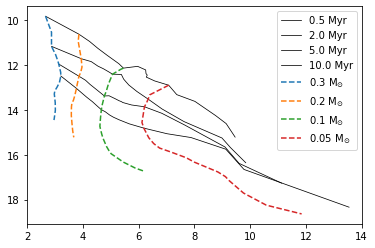

In [199]:
# Let's reproduce something very much like Lalchand et al. 2022
# But - projected into the observable space for 
#okay, so 

fig, ax = plt.subplots(1)

ages = [0.5, 2.0, 5.0, 10.0]

for age in ages:
    
    myr_x = load_isochrone_generic(age)
    
    teff = myr_x[:,1]
    Mk = myr_x[:, -1]
    M = myr_x[:, 0]
    
    u = M <= 0.3
    
    SpT = get_SpT_from_Teff_HH14(teff)
    
    plt.plot(
        SpT[u], 
        Mk[u] + distmod, 
        'k',
        lw=0.75,
        label=f"{age} Myr"
    )

all_ages_Gyr = extract_age_array_Gyr(file)

masses = [0.3, 0.2, 0.1, 0.05]
myr_0_5 = load_isochrone_generic(0.5)
mass_array = myr_0_5[:,0]


for i, mass in enumerate(masses):
    # get the evolutionary track for all ages
    all_isochrones = []
    for age in all_ages_Gyr[all_ages_Gyr < 0.5]:
        all_isochrones.append(load_isochrone_generic(age*1e3))
    myr_stack = np.vstack(all_isochrones).reshape(len(all_isochrones), 30,11)    
    
    mass_index = np.where(mass == mass_array)[0]
    mi = mass_index
    print(f"mass_index={mass_index}")
    
    teff_i = myr_stack[:,mi,1]
    Mk_i = myr_stack[:,mi, -1]
    M_i = myr_stack[:,mi, 0]

    SpT_i = get_SpT_from_Teff_HH14(teff_i)
    
    plt.plot(
        SpT_i, 
        Mk_i + distmod, 
        '--',
        label=f"{mass} M$_{{\odot}}$"
    )
    
#     if M_i[0] <= 0.3:
#         if M_i[0] in masslist:
#             print("M = ", M_i[0])
#             plt.plot(SpT_i, Mk_i + distmod, label=f"{M_i[0]} M$_{{\odot}}$") 
        
ax.set_xlim(2, 14)
ax.invert_yaxis()
plt.legend()

    

In [186]:
# load_isochrone_generic(0.015*1e3)

In [ ]:
%run 